# Group C: Hand Gesture Recognition

## Members

Niklas Holtz, Master Informatik.  
Joshua Falk, Bachelor Informatik.  
Julien Räker, Bachelor Informatik.


## What is gesture recognition?

It's a topic in computer science with the goal of interpreting human gestures via mathematical algorithms. Hand gestures recognition as an typical form of the recognition is used to control or interact with devices without physically touching them. There are several ways to do this, but we focus on processing images and videos using deep learning.

## Our Goals/Milestones

1. Can distinguish hand from background.
2. Detect the position of the fingers (fixed hand-rotation).
3. Detect rotated hands (static gestures).
4. Detection of patterns/gestures.
5. Assign actions to recognized gestures.
6. Detect static getures from live images.
7. Recognize moving gestures from streams of iamges.

Goals 2. and 3. may be skipped if direct pattern recognition is easier.

# Use Cases
* Change page while reading or presentation
* Change songs while listening to music
* Playback control on videos
* Zoom
* Convert gestures to emoticons for text messages
* Change volume

#Possible Problems
* Lighting
* Hand decor
* Hand color

#Some example pictures

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand0.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand1.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand2.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand3.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand4.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand5.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand6.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand7.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand8.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand9.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand10.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand11.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand12.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/JoshiHand13.jpg

<function matplotlib.pyplot.show>

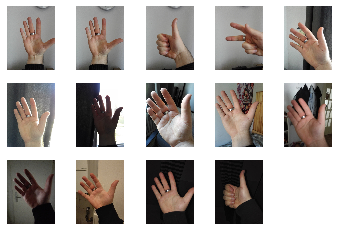

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img0 = cv2.cvtColor(cv2.imread("JoshiHand0.jpg"), cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(cv2.imread("JoshiHand1.jpg"), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread("JoshiHand2.jpg"), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread("JoshiHand3.jpg"), cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(cv2.imread("JoshiHand4.jpg"), cv2.COLOR_BGR2RGB)
img5 = cv2.cvtColor(cv2.imread("JoshiHand5.jpg"), cv2.COLOR_BGR2RGB)
img6 = cv2.cvtColor(cv2.imread("JoshiHand6.jpg"), cv2.COLOR_BGR2RGB)
img7 = cv2.cvtColor(cv2.imread("JoshiHand7.jpg"), cv2.COLOR_BGR2RGB)
img8 = cv2.cvtColor(cv2.imread("JoshiHand8.jpg"), cv2.COLOR_BGR2RGB)
img9 = cv2.cvtColor(cv2.imread("JoshiHand9.jpg"), cv2.COLOR_BGR2RGB)
img10 = cv2.cvtColor(cv2.imread("JoshiHand10.jpg"), cv2.COLOR_BGR2RGB)
img11 = cv2.cvtColor(cv2.imread("JoshiHand11.jpg"), cv2.COLOR_BGR2RGB)
img12 = cv2.cvtColor(cv2.imread("JoshiHand12.jpg"), cv2.COLOR_BGR2RGB)
img13 = cv2.cvtColor(cv2.imread("JoshiHand13.jpg"), cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(3,5)
axs[0,0].imshow(img0)
axs[0,1].imshow(img1)
axs[0,2].imshow(img2)
axs[0,3].imshow(img3)
axs[0,4].imshow(img4)
axs[1,0].imshow(img5)
axs[1,1].imshow(img6)
axs[1,2].imshow(img7)
axs[1,3].imshow(img8)
axs[1,4].imshow(img9)
axs[2,0].imshow(img10)
axs[2,1].imshow(img11)
axs[2,2].imshow(img12)
axs[2,3].imshow(img13)
[axi.set_axis_off() for axi in axs.ravel()]

plt.show


#First thoughts

*   detecting hands with skin detection
*   the color space HSV is suitable to filter specific colors




In [0]:
from google.colab import files

uploaded = files.upload()

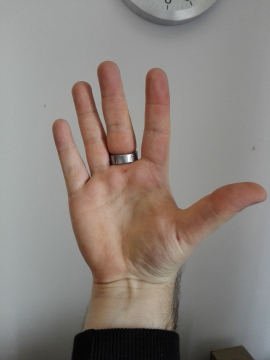

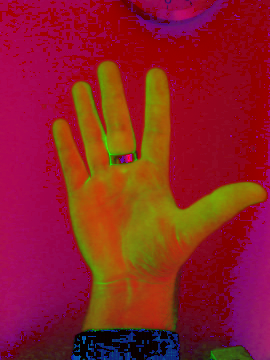

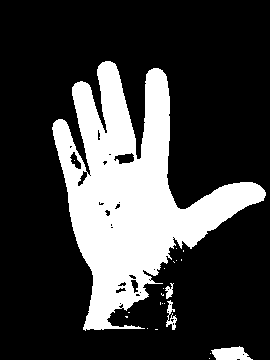

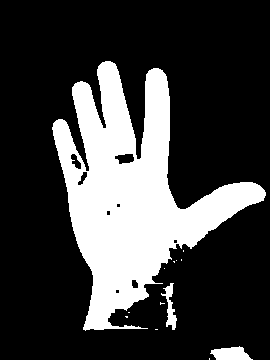

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#choosing image
img_name = "JoshiHand1.jpg"

alpha = 1
beta = 0
histSize = 250

#Open the image
image = cv2.imread(img_name)
image = cv2.resize(image, ((len(image[0])//2), (len(image)//2)))

new_img = np.zeros(image.shape, image.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      new_img[y, x, c] = np.clip(alpha * image[y, x, c] + beta, 0, 255)

#range of skin color (found on the Internet)
min_skinColor = np.array([0, 58, 30], dtype = np.uint8)
max_skinColor = np.array([33, 255, 255], dtype = np.uint8)

#convert BGR image into HSV image
hsvImage = cv2.cvtColor(new_img, cv2.COLOR_BGR2HSV)

#gets only the skin colored parts
detectedHand = cv2.inRange(hsvImage, min_skinColor, max_skinColor)

kernel = np.ones((3,3), np.uint8) 
#detectedHand = cv2.dilate(detectedHand, kernel, iterations=1)
#detectedHand = cv2.GaussianBlur(detectedHand, (5, 5), 0)

opening = cv2.morphologyEx(detectedHand, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(detectedHand, cv2.MORPH_CLOSE, kernel)



cv2_imshow(new_img)
cv2_imshow(hsvImage)
cv2_imshow(detectedHand)
cv2_imshow(closing)


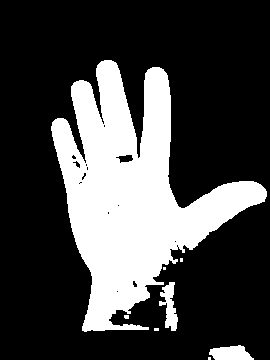

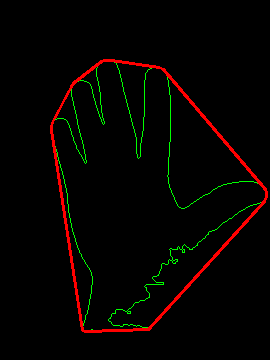

In [0]:

_, contours, hierarchy= cv2.findContours(detectedHand, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

hand = max(contours, key=cv2.contourArea)

drawing = np.zeros(image.shape, np.uint8)
hull = cv2.convexHull(hand)

cv2.drawContours(drawing, [hand], 0, (0, 255, 0), 1)
cv2.drawContours(drawing, [hull], 0, (0, 0, 255), 2)
cv2.drawContours(image, [hand], 0, (0, 255, 0), 1)
cv2.drawContours(image, [hull], 0, (0, 0, 255), 2)

cv2_imshow(detectedHand)
cv2_imshow(drawing)

##Problems with Skin Color Detection 


*   <b>works good with the right light conditions

<div>
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand1_normal.PNG">
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand1_filter.PNG">
</div>
<div>
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand2_normal.PNG">
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand2_filter.PNG">
</div>

*  cant detect skin at bad light conditions</b>
  
<div>
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand3_normal.PNG">
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand3_filter.PNG">
</div>

<div>
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand4_normal.PNG">
    <img src="https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/pics/hand4_filter.PNG" style="width:80%">
</div>

# Edge Detection Approach

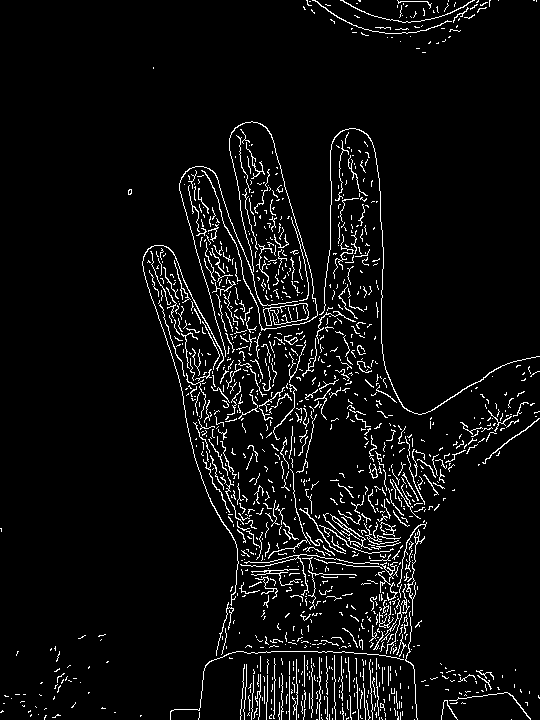

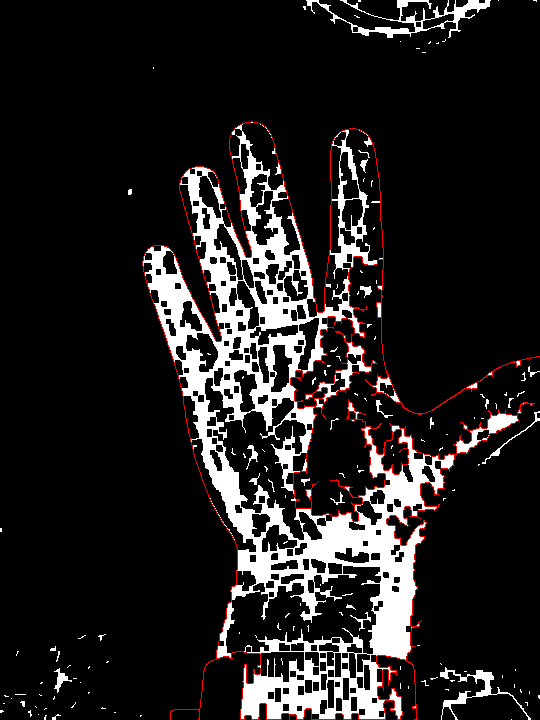

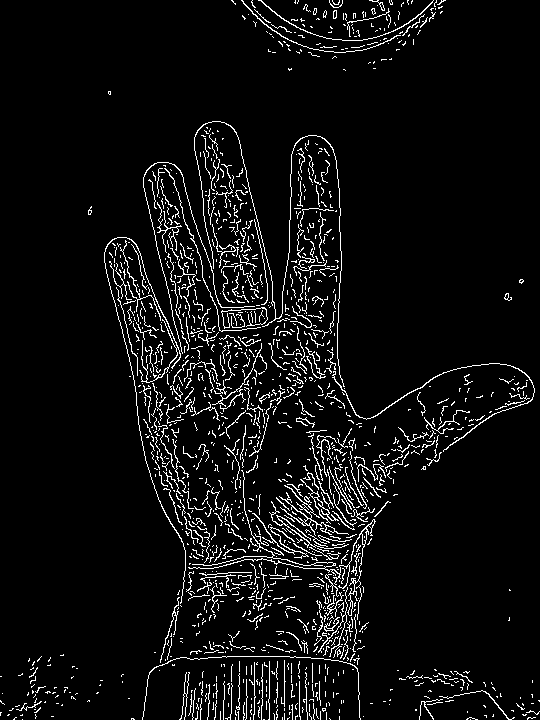

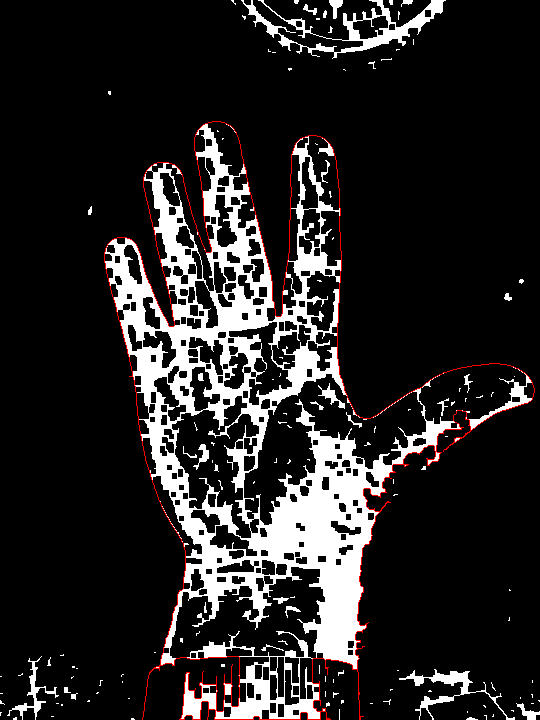

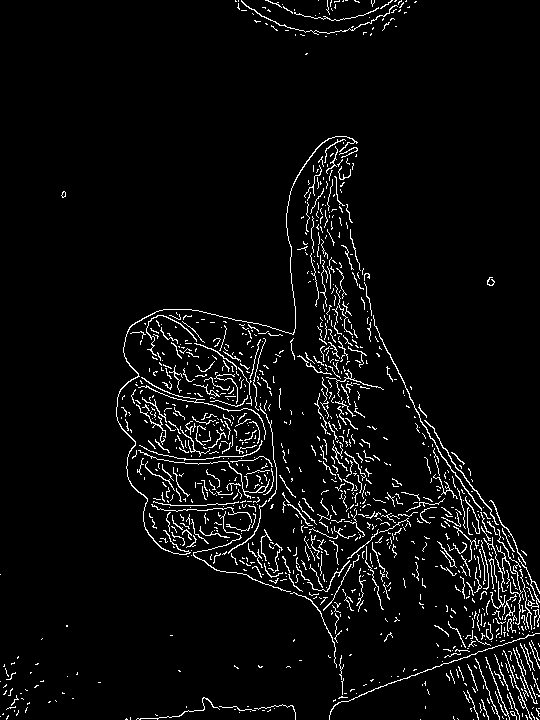

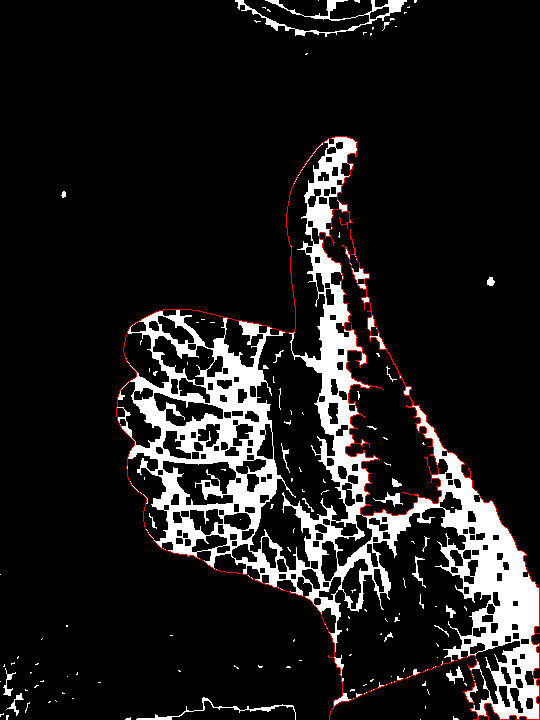

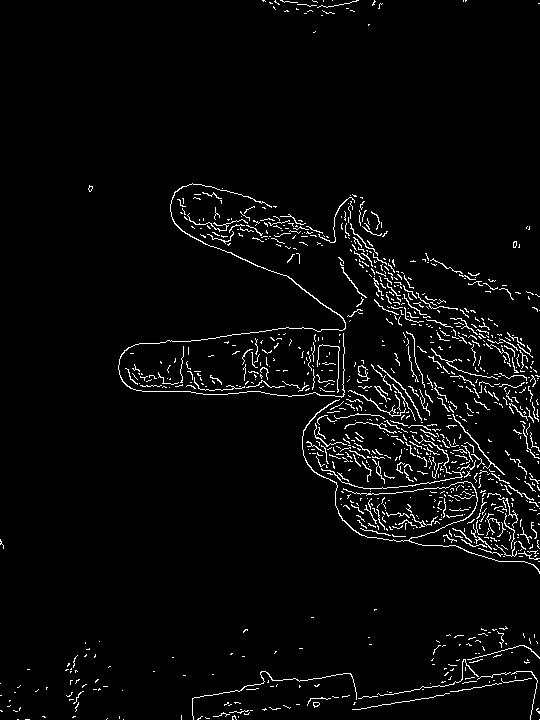

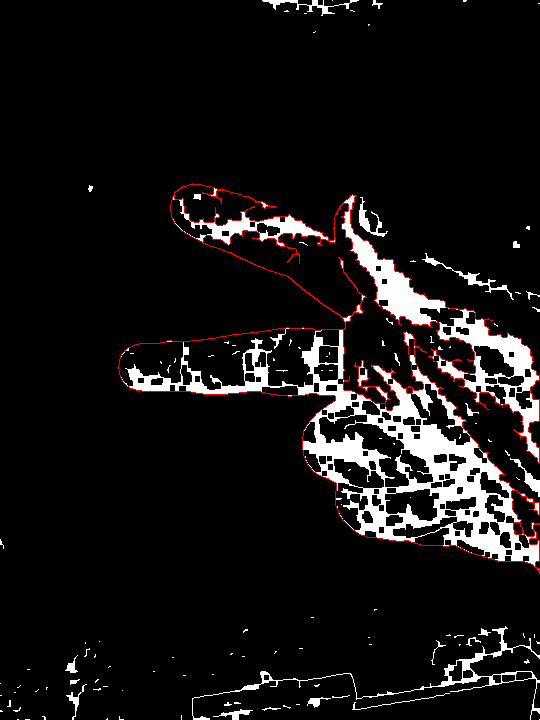

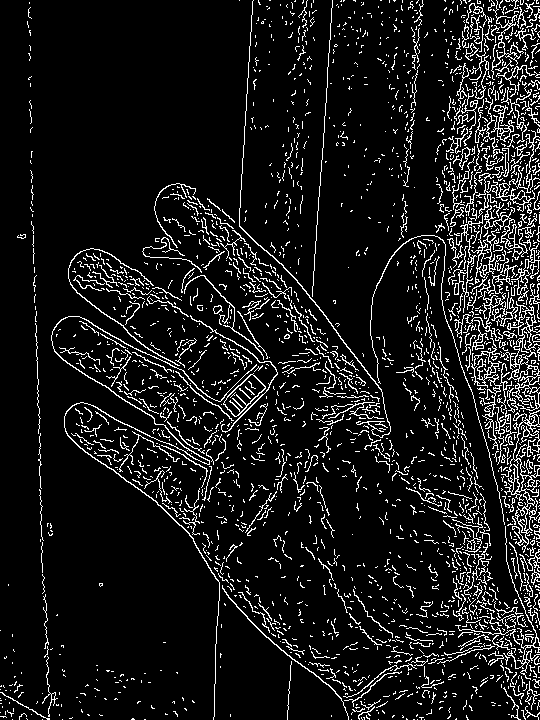

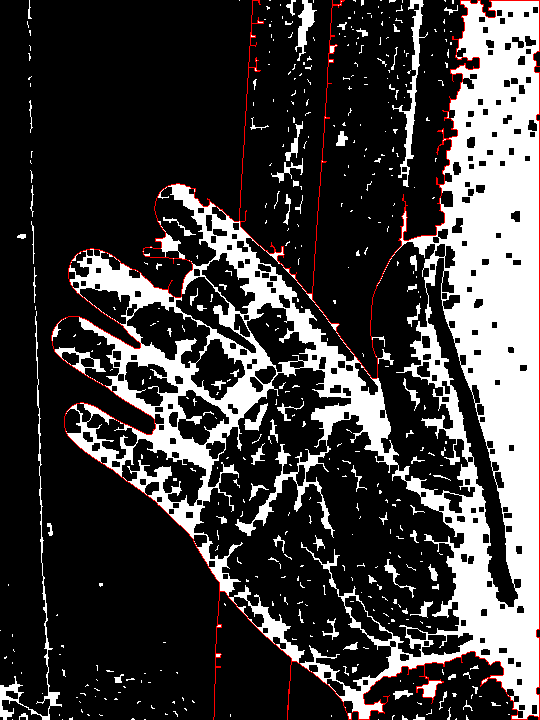

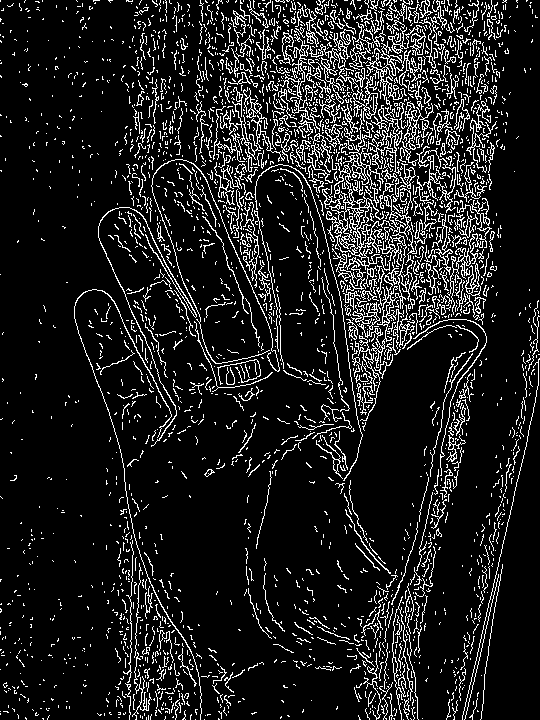

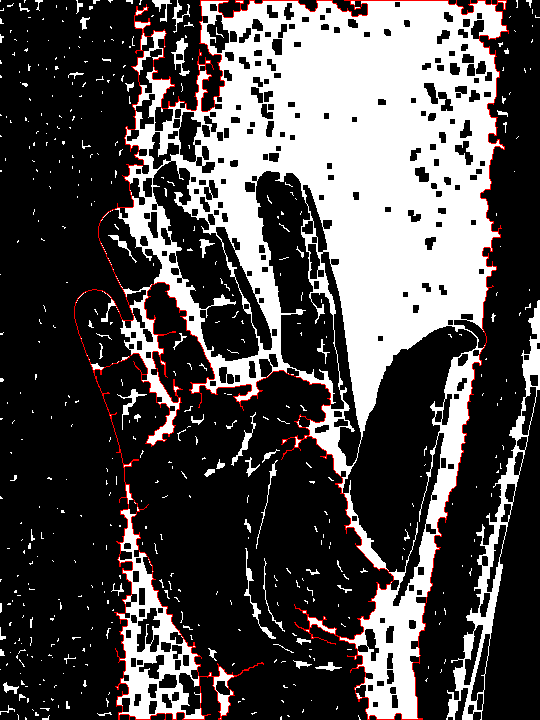

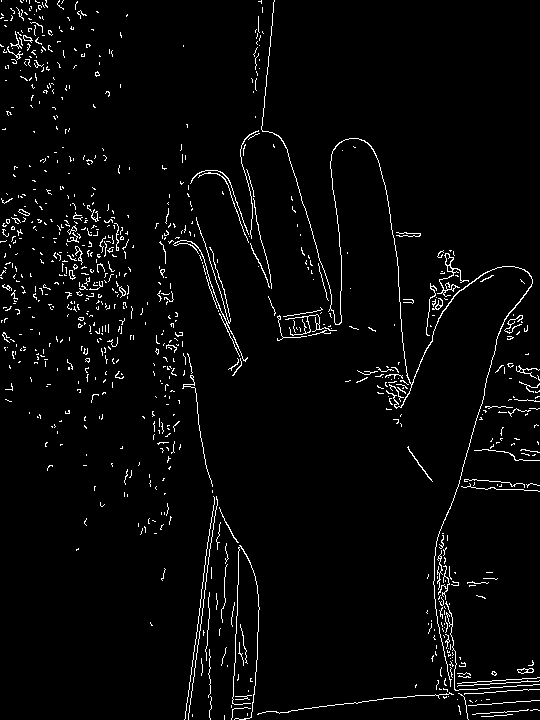

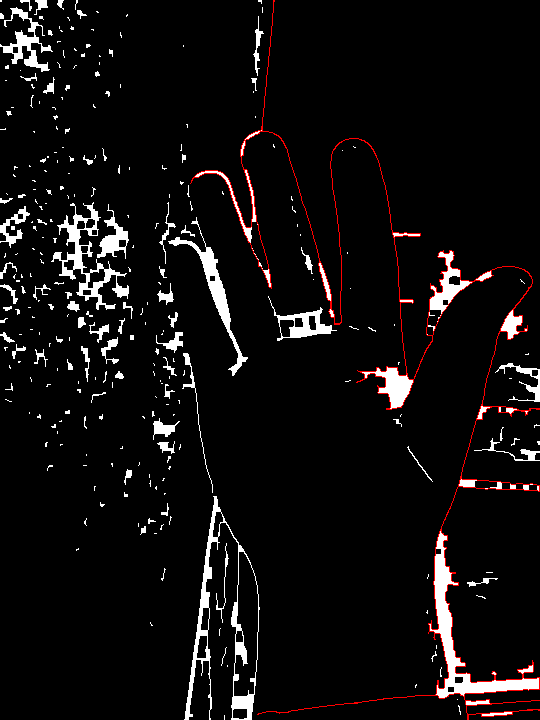

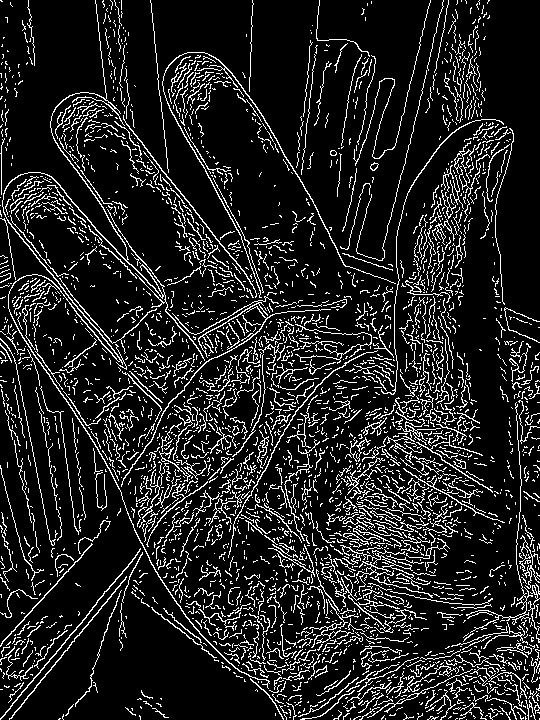

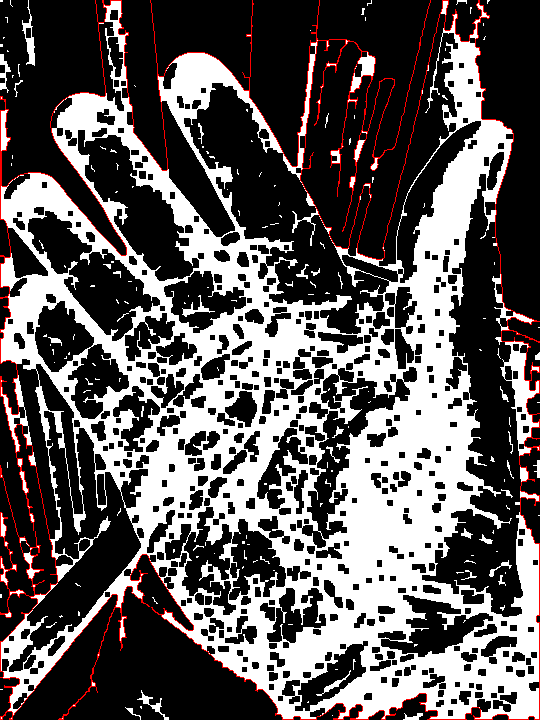

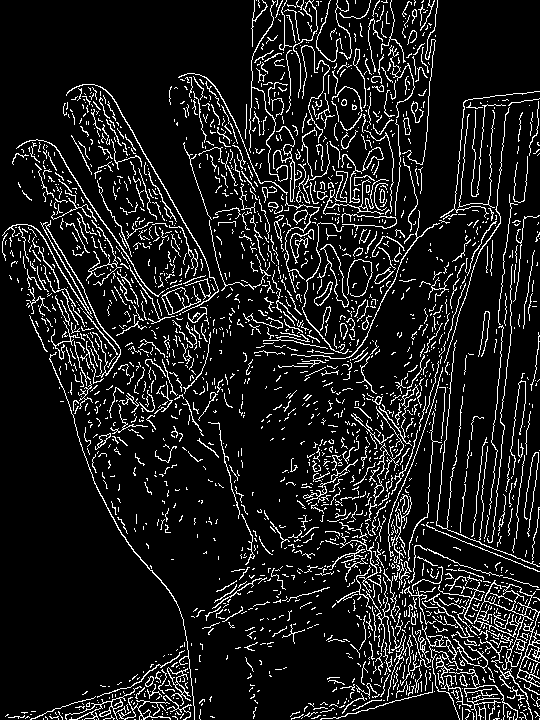

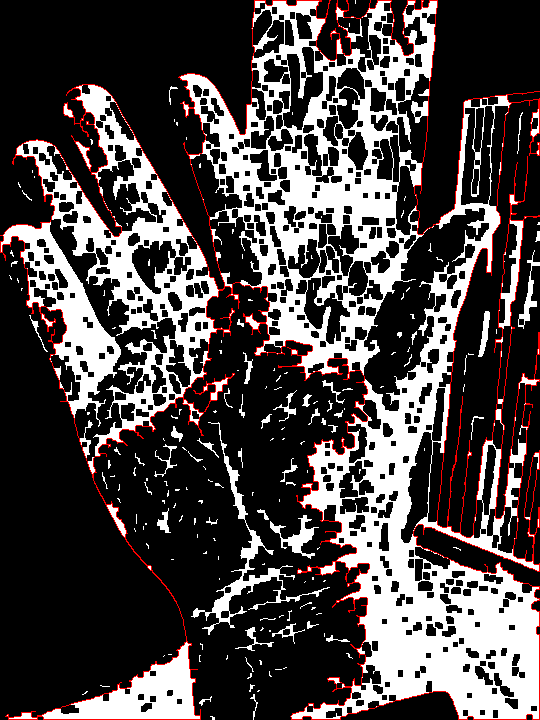

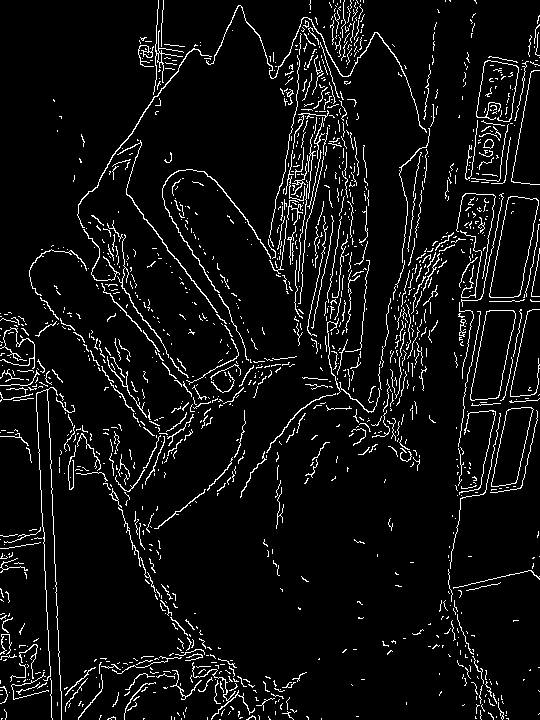

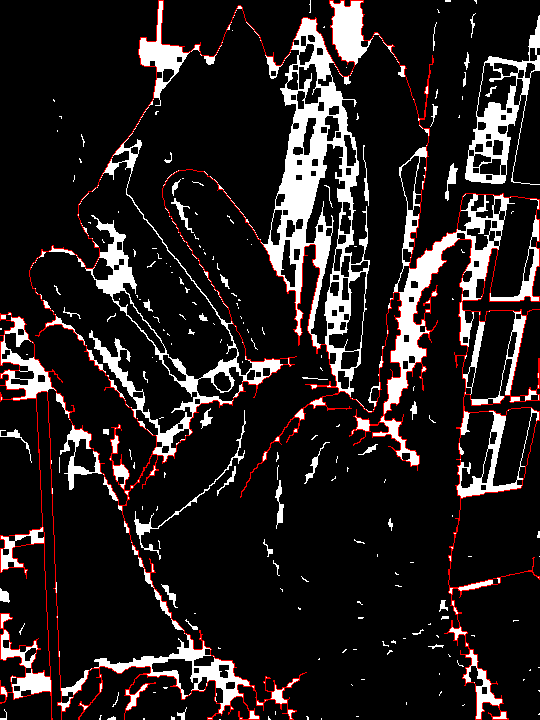

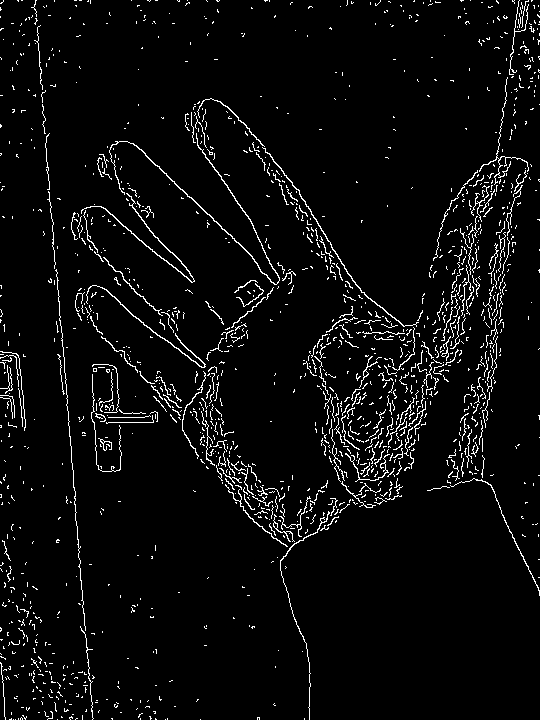

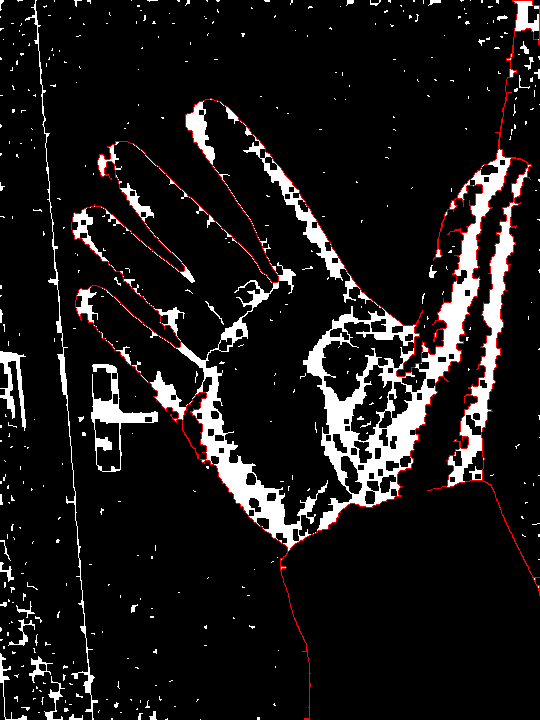

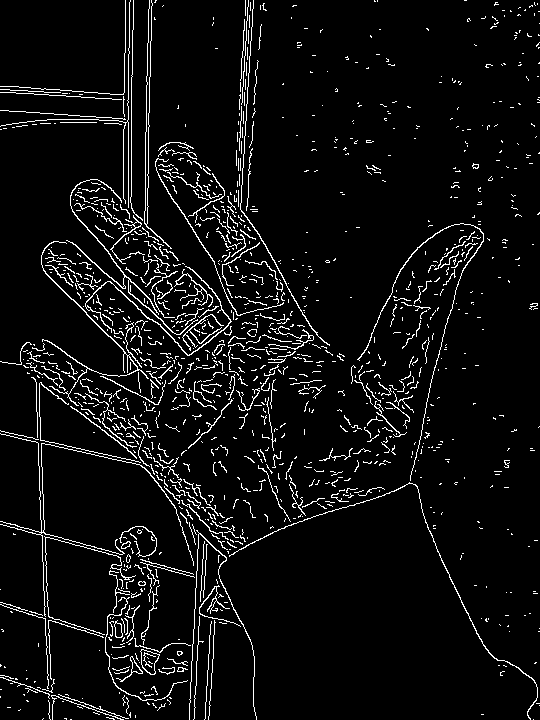

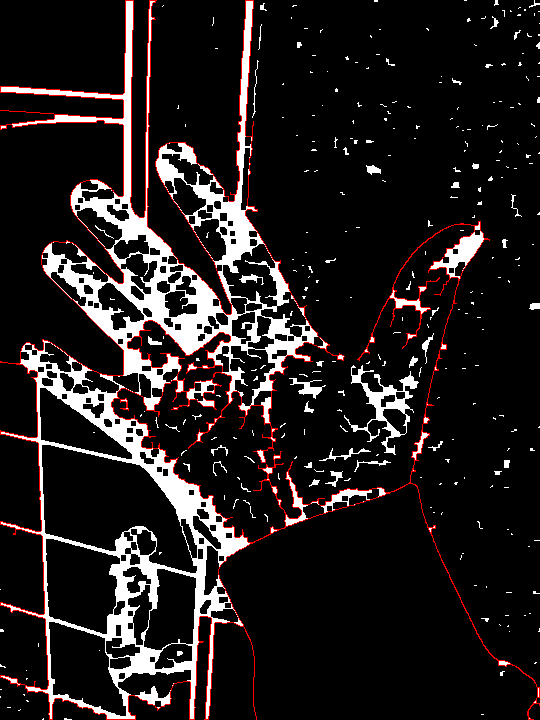

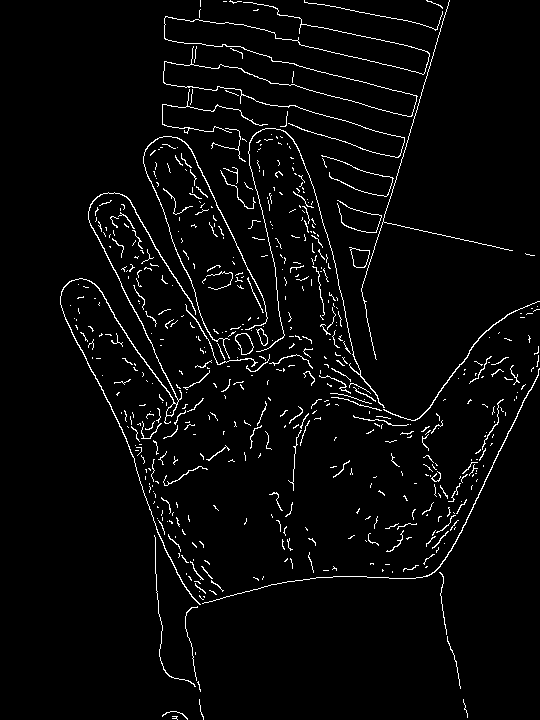

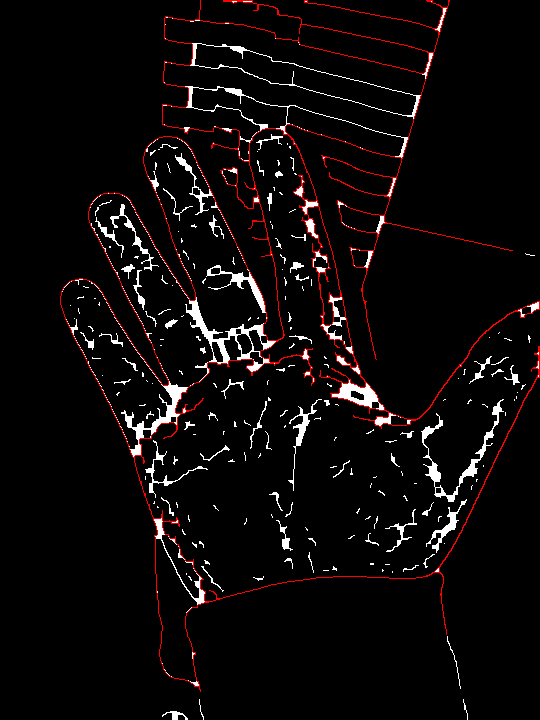

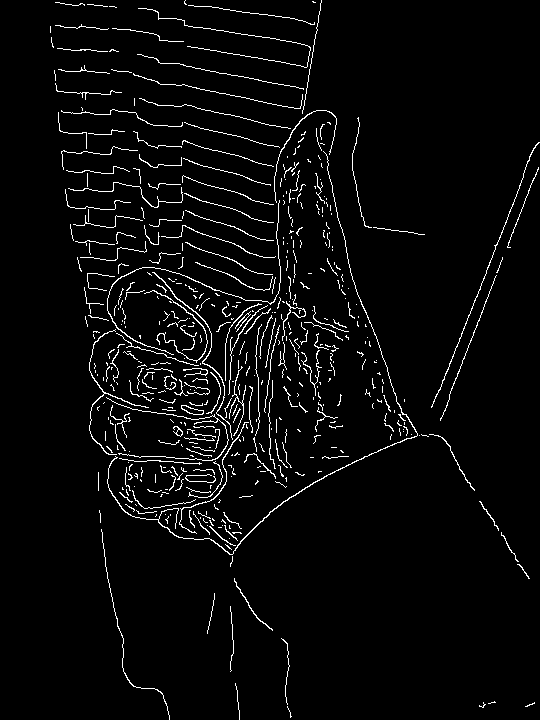

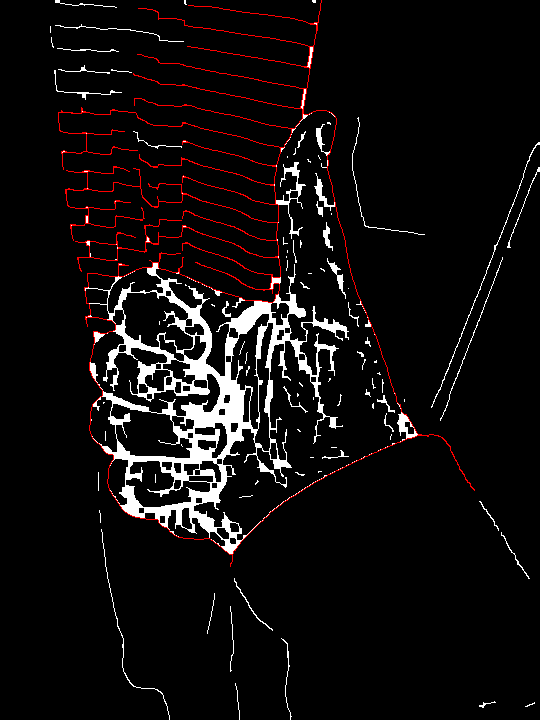

In [0]:

import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
edges_gray = 0
edges_hsv = 0
for i in range(14):
  img_string = 'JoshiHand{}.jpg'
  img = cv2.imread(img_string.format(i))
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #img_hsv_h = cv2.cvtColor(img, cv2.COLOR_BGR2HSV_FULL)[:, :, 0]
  edges_gray = cv2.Canny(img_gray, 250, 300, edges_gray, 5, True)
  #edges_hsv = cv2.Canny(img_hsv_h, 250, 300, edges_hsv, 5, True)

  closing = cv2.morphologyEx(edges_gray, cv2.MORPH_CLOSE, np.ones((5,5),np.uint8))
  #cv2_imshow(img)
  #cv2_imshow(img_gray)
  #cv2_imshow(edges_gray)
  #cv2_imshow(edges_hsv)

  _, contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  #np.zeros(closing.shape, np.uint8)
  image_cvt = cv2.cvtColor(closing, cv2.COLOR_GRAY2RGB)
  max_contour = max(contours, key=cv2.contourArea)
  contours_image = cv2.drawContours(image_cvt, [max_contour], -1, (0,0,255))

  cv2_imshow(edges_gray)
  cv2_imshow(contours_image)


##Problems with edge detection
* Busy background
* Hand contour offten has holes -> closing filter does not help

 # Camera Capturing

To capture the webcam we use an asynchronous javascript function, which allows us to connect to the webcam of the user. 

PHOTO:


<IPython.core.display.Javascript object>

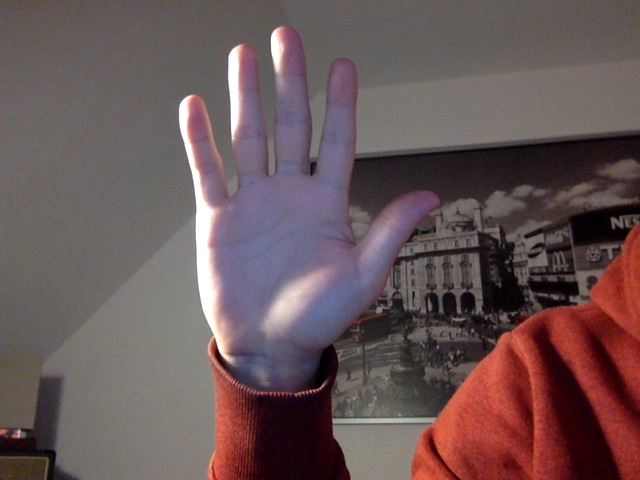

Filtered Photo:
Greyscale:


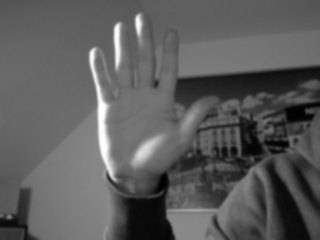

Adaptive Threshold:


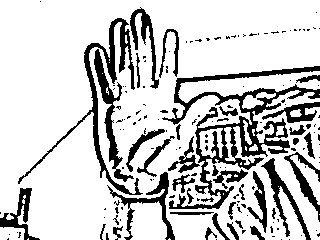

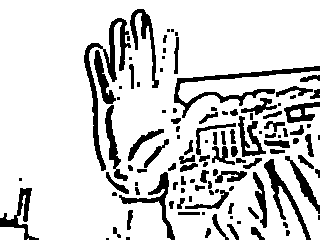

Detected Skin:


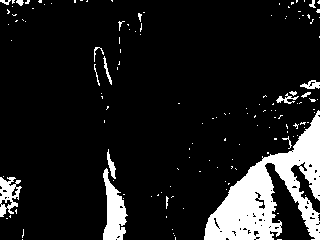

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import imutils
from google.colab.patches import cv2_imshow

""" Creates a canvas element and a button to capture a photo.
:param filename: str with and ending like .jpg or .png
:param quality: a float between 0 (worst) and 1 (best) quality.
"""
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      // Create a button to capture a photo.
      const capture = document.createElement('button');
      capture.textContent = 'Capture Photo';
      div.appendChild(capture);

      //Create a video element, which captures the webcam.
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      //Append everything and start the stream.
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
      
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return cv2.imread(filename)

def filter_by_threshold(image):
  image = cv2.resize(image, ((len(image[0])//2), (len(image)//2)))
  # Grayscale
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.GaussianBlur(image, (5, 5), 0)
  # Display result
  print('Greyscale:')
  cv2_imshow(image)
  #Adaptive Threshold
  image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
  # Display result
  print('Adaptive Threshold:')
  cv2_imshow(image)
  # Erode and dilate
  image = cv2.dilate(image, None, iterations=1)
  image = cv2.erode(image, None, iterations=1)
  return image

def detect_skin_color(image):
  image = cv2.resize(image, ((len(image[0])//2), (len(image)//2)))
  #range of skin color 
  min_skinColor = np.array([0, 48, 80], dtype = np.uint8)
  max_skinColor = np.array([33, 255, 255], dtype = np.uint8)

  #convert BGR image into HSV image
  hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  #gets only the skin colored parts
  converted_photo = cv2.inRange(hsvImage, min_skinColor, max_skinColor)

  # apply a series of erosions and dilations to the mask
  # using an elliptical kernel
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
  skinMask = cv2.erode(converted_photo, kernel, iterations = 2)
  skinMask = cv2.dilate(skinMask, kernel, iterations = 2)

  # blur the mask to help remove noise, then apply the
  # mask to the frame
  skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
  skin = cv2.bitwise_and(image, image, mask = skinMask)
  return converted_photo



try:
  print('PHOTO:')
  picture = take_photo()
  cv2_imshow(picture)
  print('Filtered Photo:')
  filtered_photo = filter_by_threshold(picture)
  cv2_imshow(filtered_photo)
  print('Detected Skin:')
  skin_photo = detect_skin_color(picture)
  cv2_imshow(skin_photo)
  # parsed_picture = parse_photo(picture)
  # contour_picture = show_contours(cv2.imread(picture))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Machine Learning



To identify the hand gesture we want to use machine learning. To traing w model we use the "Hand Gesture Recognition Database" which is available on Kaggle. This dataset contains 20000 images with different hands and different gestures. The model will cover 10 different gestures:


*   0 -> Thumb down
*   1 -> Palm (horizontal)
*   2 -> L
*   3 -> Fist (horizontal)
*   4 -> Fist (vertical)
*   5 -> Thumbs up
*   6 -> Index
*   7 -> OK
*   8 -> Palm (vertical)
*   9 -> C

We got inspiration by another project which used this Dataset:
https://github.com/filipefborba/HandRecognition/blob/master/project3/project3.ipynb

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from google.colab import files

In [0]:
uploaded = files.upload()

In [0]:
!unzip leapGestRecog.zip

unzip:  cannot find or open leapGestRecog.zip, leapGestRecog.zip.zip or leapGestRecog.zip.ZIP.


Cause i got everytime an error-message when i tried to upload the dataset to colab i trained the model locally in python. I saved the model in the "handrecognition_model.h5" file and uploaded it, to make it possible to work with it in colab

In [0]:
#upload the created model
model = files.upload()

Saving handrecognition_model.h5 to handrecognition_model.h5


In [0]:
#load the model ans show the summary
model = keras.models.load_model('handrecognition_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 116, 316, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 158, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 156, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 78, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 76, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 38, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 31616)            

In [0]:
#methode which gives back a string of the predicted gesture of a given image
def predictImage(img):
  gesture = ["down", "palm", "L", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"]
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (320, 120))
  x = []
  x.append(img)
  x = np.array(x, dtype="uint8")
  x = x.reshape(1, 120, 320, 1)
  prediction = model.predict(x)
  label = gesture[np.argmax(prediction[0])]
  return label

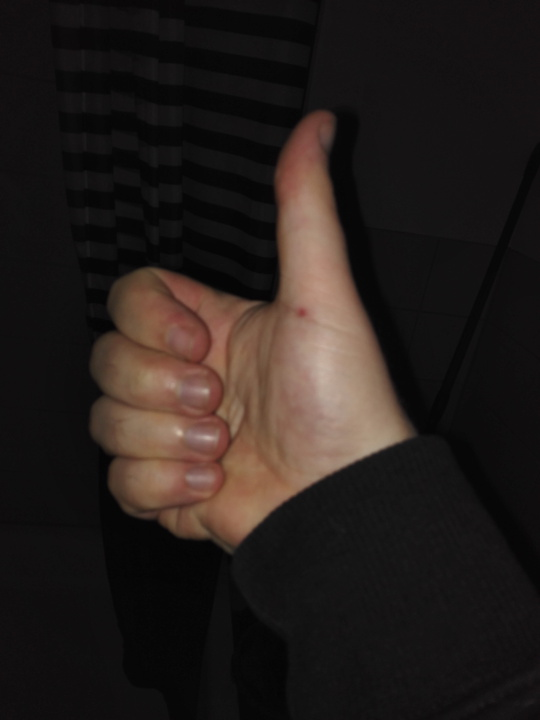

Prediction:  thumb


In [0]:
hand_thumbsUp = cv2.imread("JoshiHand13.jpg")
cv2_imshow(hand_thumbsUp)
gesture = predictImage(hand_thumbsUp)
print("Prediction: ", gesture)

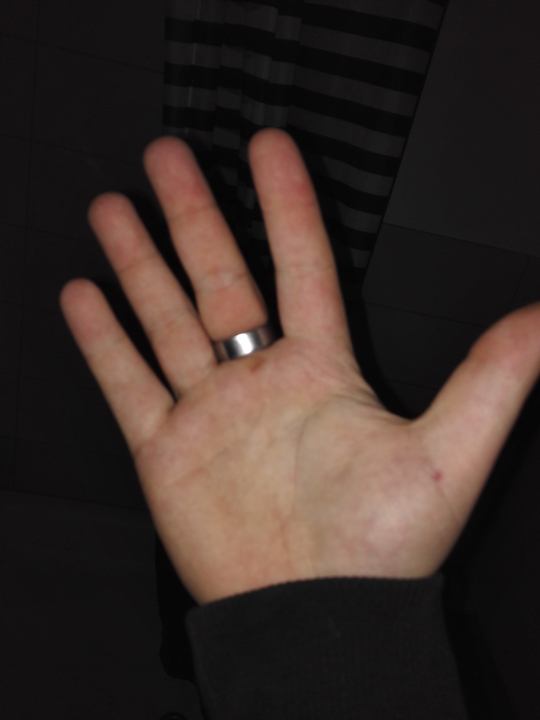

Prediction:  index


In [0]:
hand_palm = cv2.imread("JoshiHand12.jpg")
cv2_imshow(hand_palm)
gesture = predictImage(hand_palm)
print("Prediction: ", gesture)

We can see thta the prediction of the first image is correct. But for the second image we gat a wrong prediction.
To solve the problem we need to make more preprocessing. We need to make the pictures more like the pictures of the dataset with which we trained the model. Also we can try to train a new model with the pictures from the dataset which we will preprocessing this time

# Transfer Learning

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-hand-gesture/master/Dataset.zip

In [2]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
   creating: Dataset/00/
   creating: Dataset/00/0/
  inflating: Dataset/00/0/0_000.jpg  
  inflating: Dataset/00/0/0_001.jpg  
  inflating: Dataset/00/0/0_002.jpg  
  inflating: Dataset/00/0/0_003.jpg  
  inflating: Dataset/00/0/0_004.jpg  
  inflating: Dataset/00/0/0_005.jpg  
  inflating: Dataset/00/0/0_006.jpg  
  inflating: Dataset/00/0/0_007.jpg  
  inflating: Dataset/00/0/0_008.jpg  
  inflating: Dataset/00/0/0_009.jpg  
  inflating: Dataset/00/0/0_010.jpg  
  inflating: Dataset/00/0/0_011.jpg  
  inflating: Dataset/00/0/0_012.jpg  
  inflating: Dataset/00/0/0_013.jpg  
  inflating: Dataset/00/0/0_014.jpg  
  inflating: Dataset/00/0/0_015.jpg  
  inflating: Dataset/00/0/0_016.jpg  
  inflating: Dataset/00/0/0_017.jpg  
  inflating: Dataset/00/0/0_018.jpg  
  inflating: Dataset/00/0/0_019.jpg  
  inflating: Dataset/00/0/0_020.jpg  
  inflating: Dataset/00/0/0_021.jpg  
  inflating: Dataset/00/0/0_022.jpg  
  inflating: Dataset/00/0/0_02





58892288/58889256 [==============================] - 2s 0us/step








In [0]:
validation_features, validation_labels = extract_fbase_dir + '05'al510ion_dir, 1000, 'validation')
train_features5, train_labels5 = extract_features(base_dir + '06', 340, 'training')
validation_features, validation_labels = extract_features(vabase_dir + '00'10180'validation')
train_features6, train_labels6 = extract_features(train_dir,base_dir + '01'ng180ain_features1, train_labels1 = extract_features(train_dir, 2000, 'training')
validation_features0, valida/tion_labels0 = extract_features(base_dir + '02', 180, 'validation')
train_features2, tr1ain_labels2 = extra1ct_features(train_dibase_dir + '03'ni90
validation_features2, validation_labels2 = extract_features(base_dir + '04', 90, 'validation')
train_features0, train_labels0 = extract_features(base_dir +base_dir +1'05'training90lidation_features3, validation_labels3 = extract_features(validation_dir, 1000, 'validation')

train_features
3, t4rain_labels3 =5 ext4ract_featbbase_dir bas12dir +1106' + '30'02002000, 'tr60g')
validation_features6, validation_labels6 = ex2ra2tbase_dir + '04'(v510ation_dir, 1000, 'validation')

Found 1021 images belonging to 8 classes.
Found 1021 images belonging to 8 classes.
Found 1021 images belonging to 8 classes.
